In [27]:
import os
import scoring
import numpy as np
import pandas as pd
from ggplot import *
import matplotlib.pyplot as plt
from pylab import rcParams

# get current working directory children for analysis
dirs = next(os.walk('.'))[1]
dirs = [x for x in dirs if not x.startswith('.') and not x.startswith('old')]

# set up some dictionaries
res = {}
gs = {}
episodes = {}
rewards = {}
lengths = {}

# calculate graph stats for all the directories
count = 0
for d in dirs:
    try:
        res[d] = scoring.score_from_local(d)
        eplens = res[d]['episode_lengths']
        eprews = res[d]['episode_rewards']
        timestamps = res[d]['timestamps']
        irt = res[d]['initial_reset_timestamp']
        # set number of buckets = number of episodes
        buckets = len(res[d]['episode_lengths'])
        gs[d] = scoring.compute_graph_stats(eplens, eprews, timestamps, irt, buckets)
        episodes[d] = gs[d]['x_episode_y_reward']['x']
        rewards[d] = gs[d]['x_episode_y_reward']['y']
        lengths[d] = gs[d]['x_episode_y_length']['y']
        count += 1
    except Exception as e:
        print('Error', e, d)
        pass

# build data frames
dfRewards = pd.DataFrame.from_dict(rewards)
dfLengths = pd.DataFrame.from_dict(lengths)

# calculate group mean and standard deviations
groupMeanRewards = dfRewards.mean(axis=1)
groupStdRewards = dfRewards.std(axis=1)
groupMeanLengths = dfLengths.mean(axis=1)
groupStdLengths = dfLengths.std(axis=1)

# get episodes from indexes
eps = dfRewards.index

print(dirs)
dfRewards.head()

['test1', 'test2', 'test3', 'test4', 'test5', 'test6']


,test1,test2,test3,test4,test5,test6
0,18.0,47.0,12.0,10.0,18.0,12.0
1,15.0,21.0,22.0,15.0,10.0,35.0
2,14.0,16.0,12.0,41.0,11.0,70.0
3,32.0,16.0,13.0,20.0,15.0,28.0
4,11.0,14.0,12.0,20.0,13.0,9.0


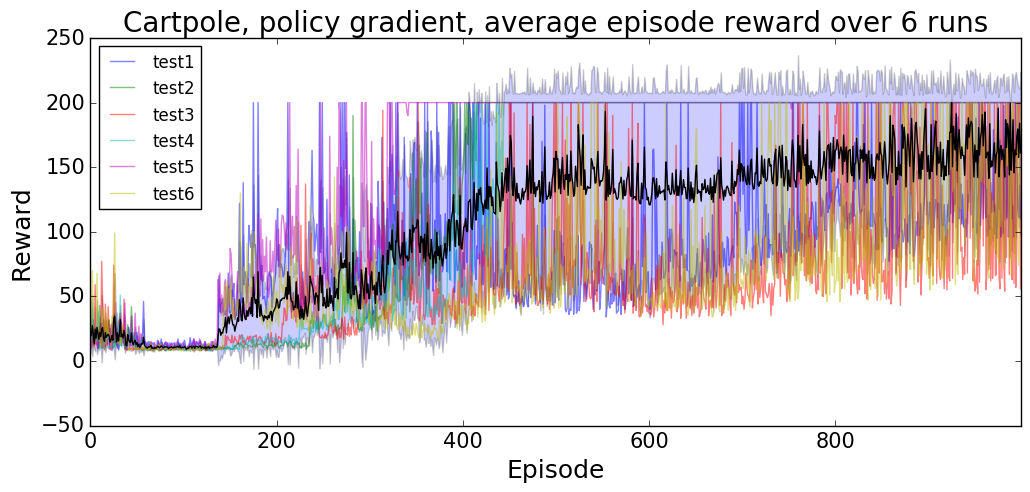

In [29]:
rcParams['figure.figsize'] = 12, 5
ax = dfRewards.plot(alpha=0.5)
ax.set_title('Cartpole, policy gradient, average episode reward over ' + str(count) + ' runs', fontsize=20)
plt.plot(eps, groupMeanRewards, "k")
plt.fill_between(eps, groupMeanRewards+groupStdRewards, groupMeanRewards-groupStdRewards, facecolor='blue', alpha=0.2)
plt.xticks(color='k', size=15)
plt.yticks(color='k', size=15)
ax.set_xlabel('Episode', fontsize=18)
ax.set_ylabel('Reward', fontsize=18)
plt.show()

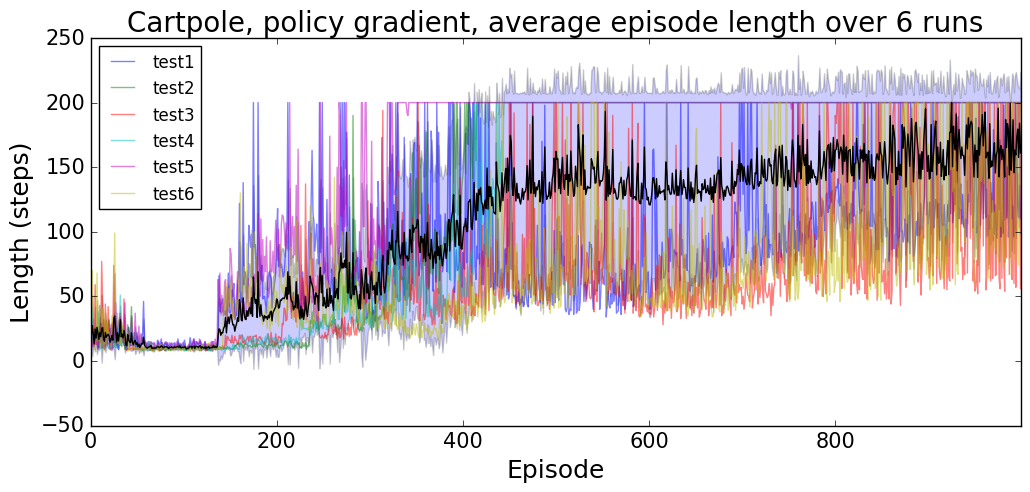

In [32]:
rcParams['figure.figsize'] = 12, 5
ax = dfRewards.plot(alpha=0.5)
ax.set_title('Cartpole, policy gradient, average episode length over ' + str(count) + ' runs', fontsize=20)
plt.plot(eps, groupMeanLengths, "k")
plt.fill_between(eps, groupMeanLengths+groupStdLengths, groupMeanLengths-groupStdLengths, facecolor='blue', alpha=0.2)
plt.xticks(color='k', size=15)
plt.yticks(color='k', size=15)
ax.set_xlabel('Episode', fontsize=18)
ax.set_ylabel('Length (steps)', fontsize=18)
plt.show()